# Visualization of Confirmed Cases in Cities of Texas

The below notebook provides a visualization of the confirmed cases in different cities in Texas.

## Process

I first downloaded and retrieved data from the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University, or JHU CSSE COVID-19 Data (found [here](https://github.com/CSSEGISandData/COVID-19)). Next, I isolated the Texas cases by checking if the "Province_State" label was "Texas." I then graphed cities within that sub-dataset and plotted each coronavirus trend in each Texas city available onto the graph.

In [1]:
import sys
sys.path.insert(0, '..')

from utils import data
import os
import sklearn
import numpy as np
import json
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
# ------------ HYPERPARAMETERS -------------
BASE_PATH = '../COVID-19/csse_covid_19_data/'
MIN_CASES = 1000
# ------------------------------------------

In [3]:
confirmed = os.path.join(
    BASE_PATH, 
    'csse_covid_19_time_series',
    'time_series_covid19_confirmed_US.csv')
confirmed = data.load_csv_data(confirmed)

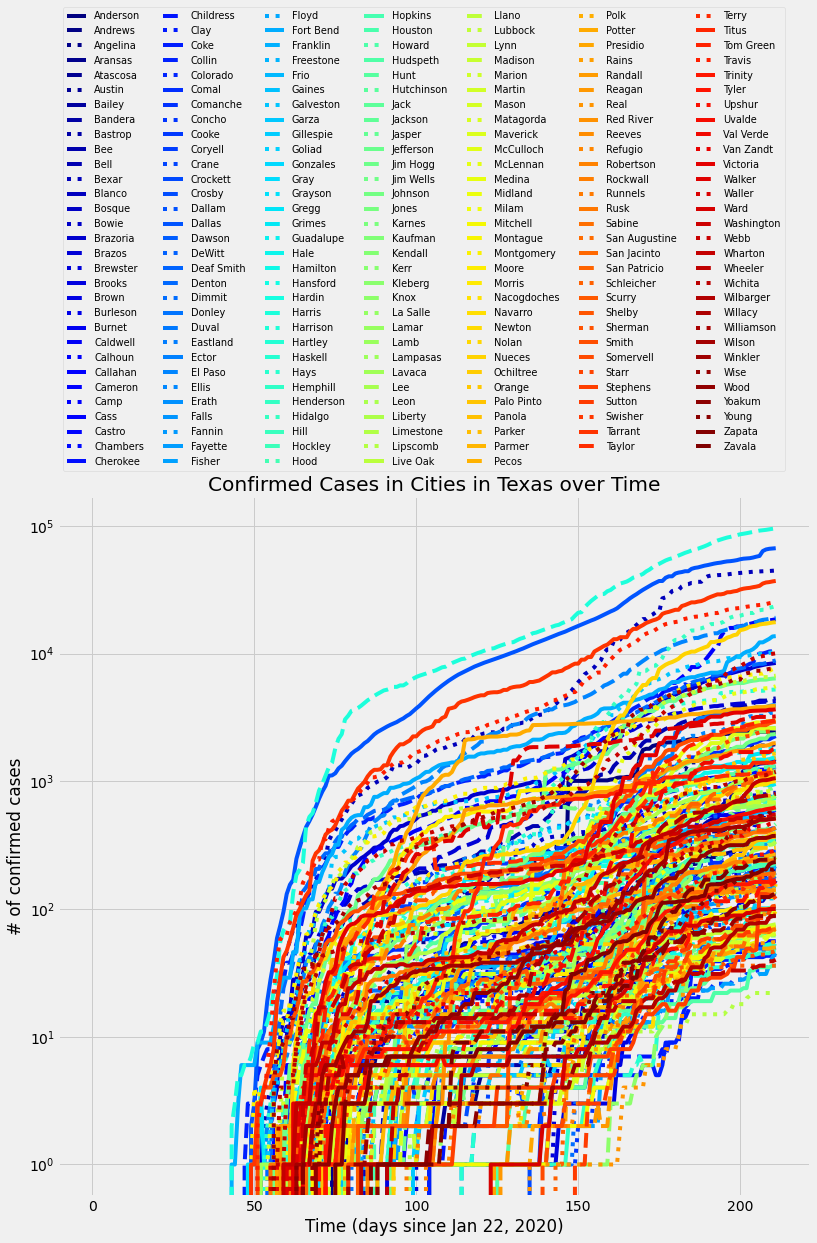

In [4]:
# Texas Cities Plot

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cm = plt.get_cmap('jet')
NUM_COLORS = 0
LINE_STYLES = ['solid', 'dashed', 'dotted']
NUM_STYLES = len(LINE_STYLES)

texas_cases = confirmed[confirmed["Province_State"] == "Texas"]

for val in np.unique(texas_cases["Admin2"]):
    df = data.filter_by_attribute(
        texas_cases, "Admin2", val)
    cases, labels = data.get_cases_chronologically_US(df)
    cases = cases.sum(axis=0)

    if cases.sum() > MIN_CASES:
        NUM_COLORS += 1

colors = [cm(i) for i in np.linspace(0, 1, NUM_COLORS)]
legend = []
handles = []

for val in np.unique(texas_cases["Admin2"]):
    df = data.filter_by_attribute(
        texas_cases, "Admin2", val)
    cases, labels = data.get_cases_chronologically_US(df)
    cases = cases.sum(axis=0)

    if cases.sum() > MIN_CASES:
        i = len(legend)
        lines = ax.plot(cases, label=val)
        handles.append(lines[0])
        lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])
        lines[0].set_color(colors[i])
        legend.append(val)

ax.set_ylabel('# of confirmed cases')
ax.set_xlabel("Time (days since Jan 22, 2020)")

ax.set_yscale('log')
ax.legend(handles, legend, bbox_to_anchor=(0., 1.03), loc=3, ncol=7, fontsize='x-small')
plt.title("Confirmed Cases in Cities in Texas over Time")
plt.savefig('results/texas_city_cases.png', bbox_inches='tight')
plt.show()